<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [525]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [526]:
sat_filepath = '/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/state_sat_scores/sat_scores.csv'

In [527]:
rows = []

with open(sat_filepath, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
        
header = rows[0]
data = rows[1:]

In [528]:
sat_data = {}

for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])

In [529]:
print sat_data

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [530]:
pd.DataFrame(sat_data)

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520
5,499,71,RI,501
6,499,71,PA,500
7,506,69,VT,511
8,500,69,ME,506
9,501,68,VA,510


In [531]:
 pd.read_csv(sat_filepath)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [532]:
x = pd.read_csv(sat_filepath)
x.head(10)
# or x[0:10]

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [533]:
print x.shape
print x.info()

(52, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [ ]:
#                          FINISH!!!!!!!!!!!!!!!!!!

In [534]:
data_description = {
                    'Names': ['State', 'Rate', 'Verbal', 'Math'], 
                    'Type': ['object', 'int', 'int', 'int'],
                    'Descrition': ['', '', '', ''], 
                    'Shape': ['4 columns', '52 rows', '', '']
                   }
pd.DataFrame(data_description)

,Descrition,Names,Shape,Type
0,,State,4 columns,object
1,,Rate,52 rows,int
2,,Verbal,,int
3,,Math,,int


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [535]:
import seaborn as sns

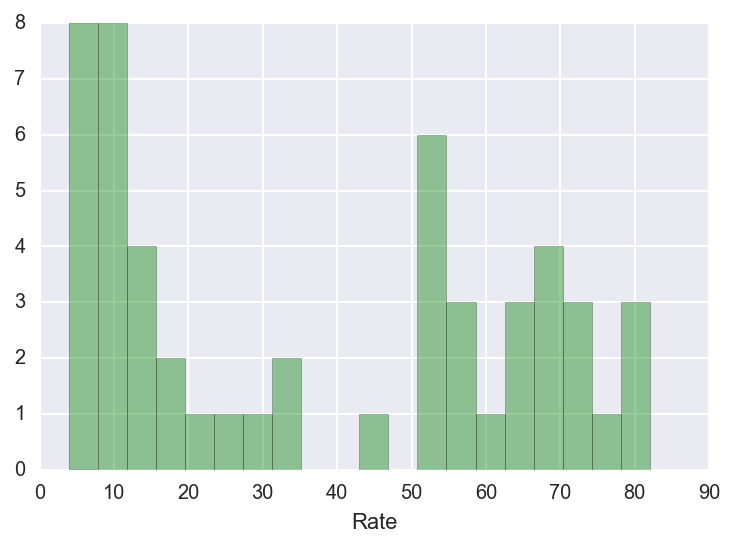

In [536]:
sns.distplot(x['Rate'], bins=20, kde=False, color = 'green');

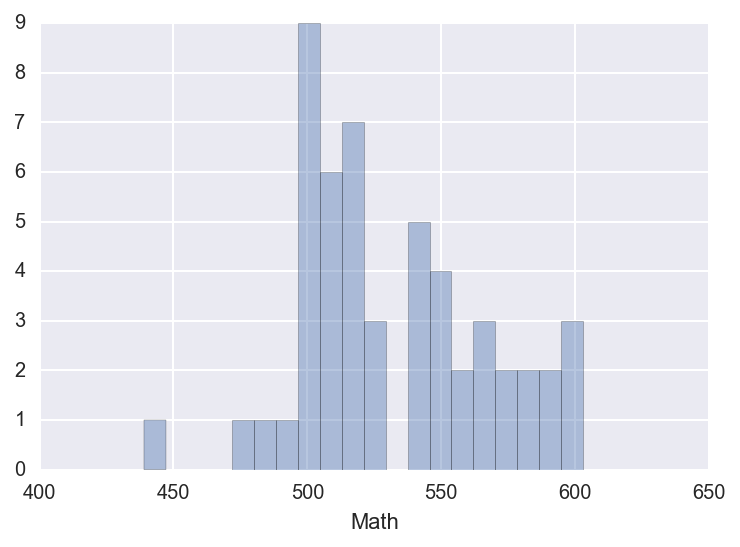

In [537]:
sns.distplot(x['Math'], bins=20, kde=False);

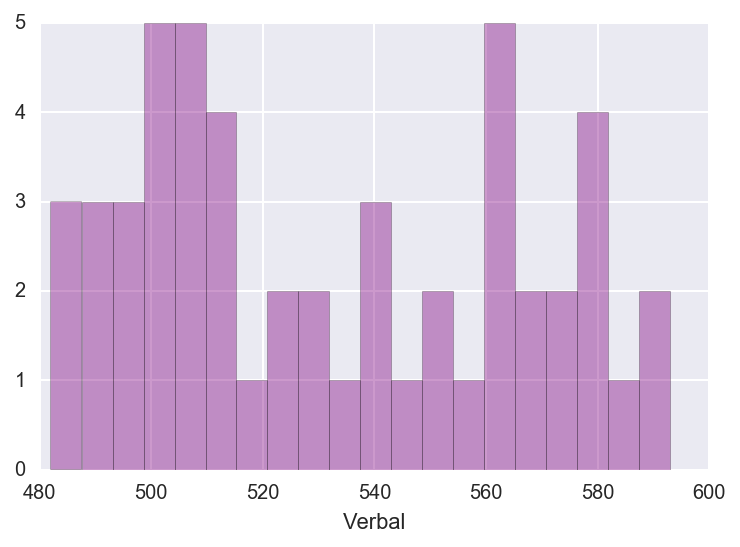

In [538]:
sns.distplot(x['Verbal'], bins=20, kde=False, color = 'purple');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [ ]:
#               THINGS!!!!!!!

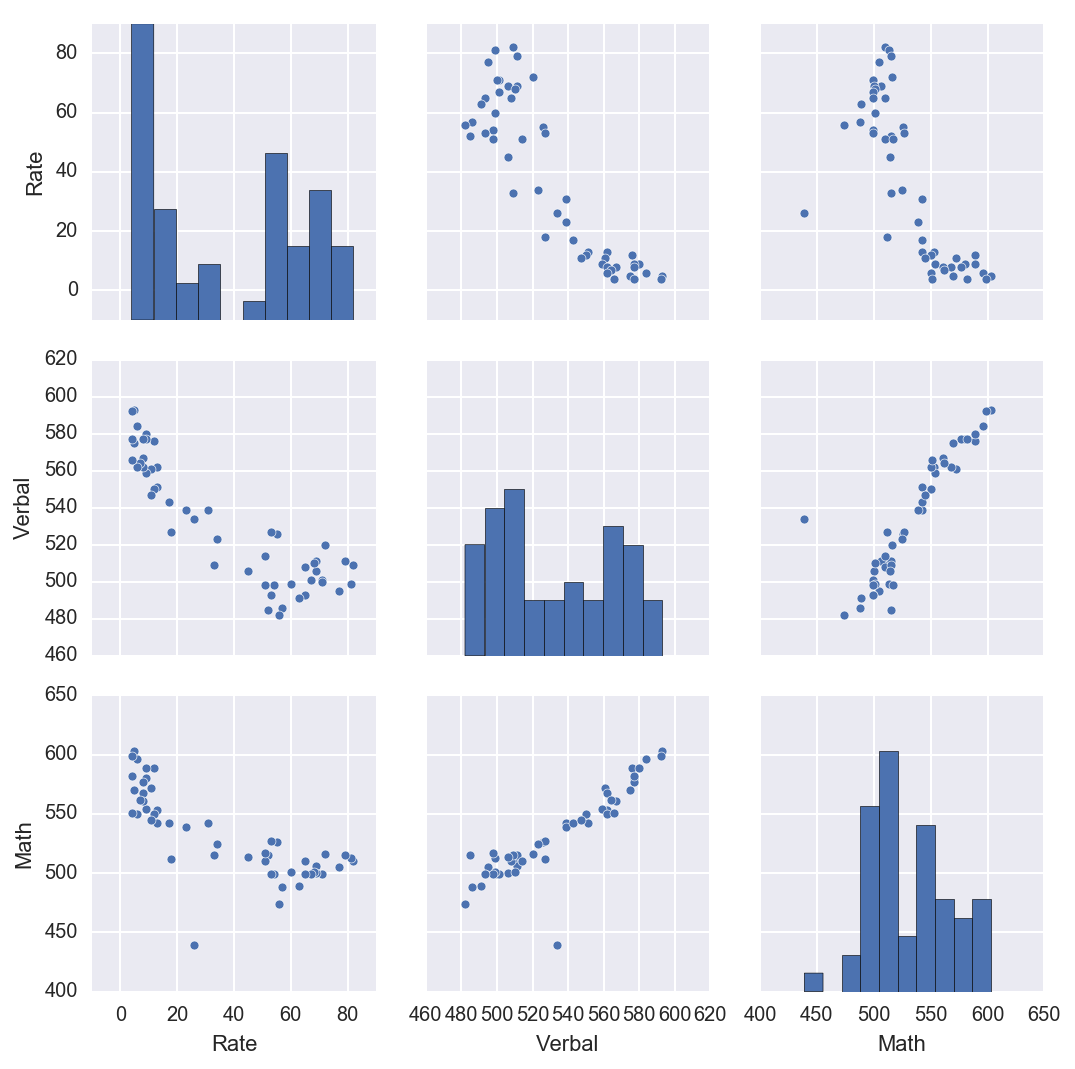

In [539]:
sns.pairplot(x)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

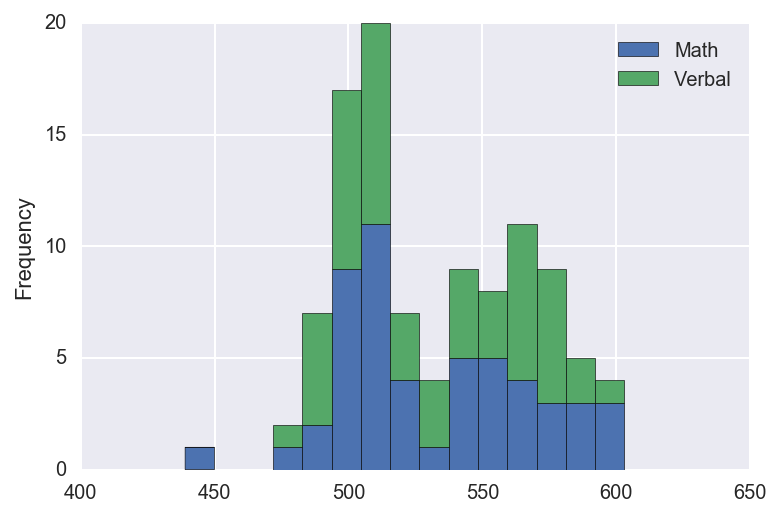

In [540]:
hist = pd.DataFrame({'Verbal':x['Verbal'], 'Math':x['Math'] })

hist.plot(kind='hist', stacked=True, bins=15)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
#                      BENIFITS!!!!!!!!!!!!!!

In [ ]:
#                        WRONG!!!!!!!!!!!!!

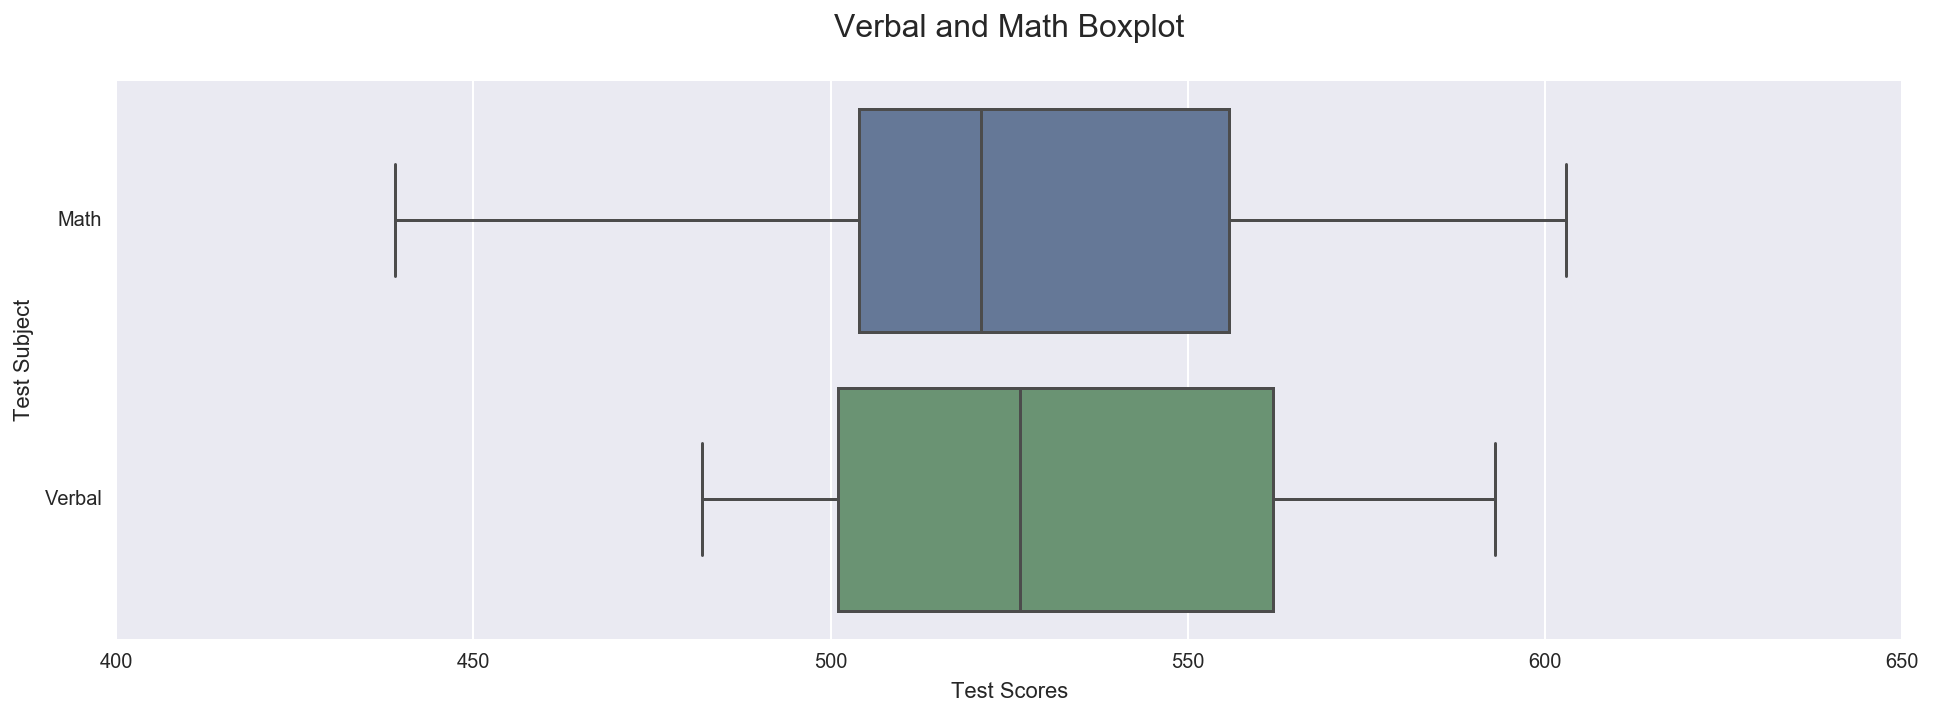

In [541]:
fig = plt.figure(figsize=(16,5))
ax = fig.gca()

ax = sns.boxplot(data=hist,
                 orient='h', fliersize = 8, linewidth=1.5, 
                 notch = False, saturation =0.5, ax =ax)

ax.set_xlabel('Test Scores')
ax.set_ylabel('Test Subject')
ax.set_title('Verbal and Math Boxplot\n', fontsize=16)

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [542]:
import matplotlib.pyplot as plt

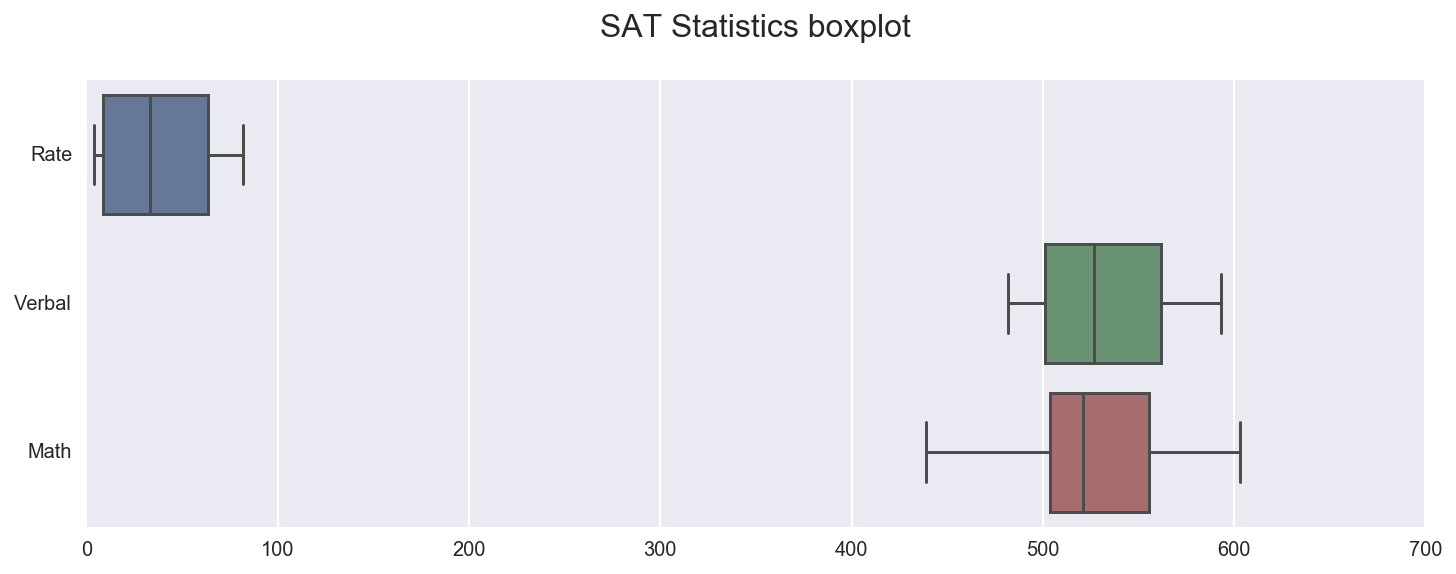

In [543]:
fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.boxplot(x[['Rate', 'Verbal', 'Math']],orient='h', fliersize = 8, linewidth=1.5, 
                 notch = False, saturation =0.5, ax =ax)

ax.set_title('SAT Statistics boxplot\n', fontsize=16)
plt.show()

In [544]:
# for Rate, Verbal, and Math all on one graph the data needs to be normalized
# This needs to happen because otherwise the range of the graph has to too large to be useful

x_norm = (x - x.mean()) / x.std()

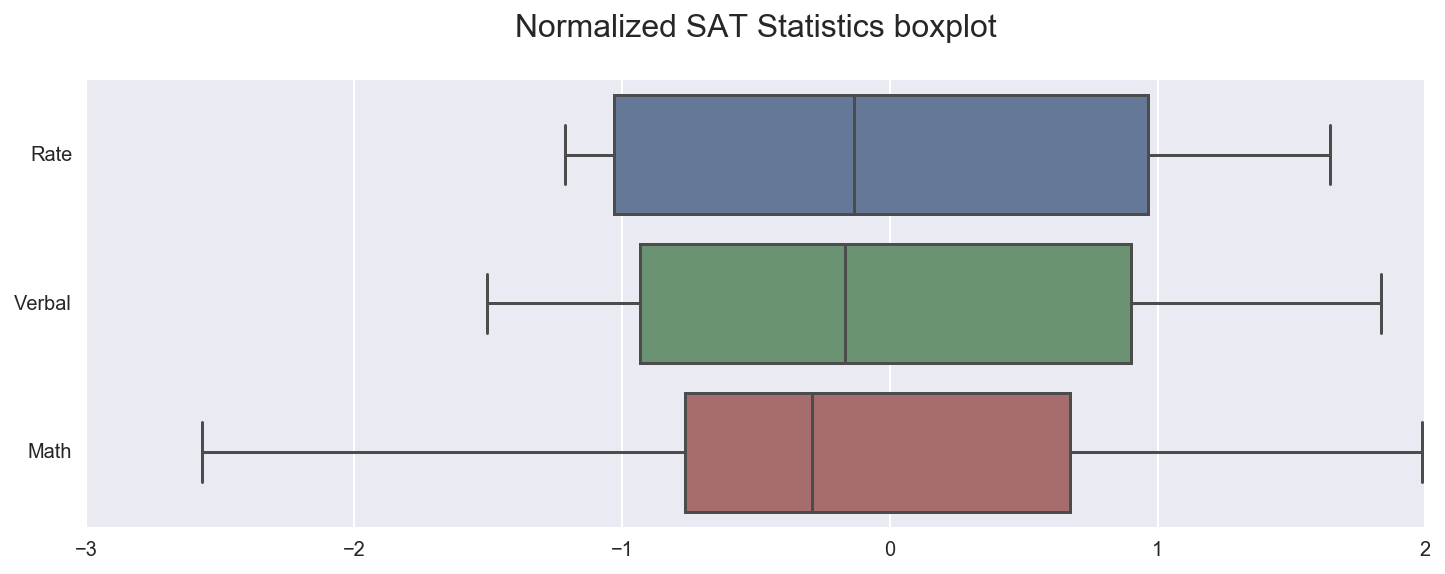

In [545]:
fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.boxplot(x_norm[['Rate', 'Verbal', 'Math']],orient='h', fliersize = 8, linewidth=1.5, 
                 notch = False, saturation =0.5, ax =ax)

ax.set_title('Normalized SAT Statistics boxplot\n', fontsize=16)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [546]:
verbal_mean = np.mean(x['Verbal'])

verbal_above_mean = x.Verbal > verbal_mean

temp = x.loc[verbal_above_mean,:]
len(temp)
temp[['State']]

,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [547]:
verbal_median = np.median(x['Verbal'])

verbal_above_median = x.Verbal > verbal_median

temp2 = x.loc[verbal_above_mean,:]
len(temp2)
temp2[['State']]
# the lists are the same becasue the mean and median are very close 

,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [548]:
x['Verbal_Math'] = x['Verbal']-x['Math']

x.head(3)

,State,Rate,Verbal,Math,Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [549]:
high_diff = x.Verbal_Math > 5
temp3 = x.loc[high_diff,:]
print len(temp3)
temp3.sort('Verbal_Math').head(3)

10


/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State,Rate,Verbal,Math,Verbal_Math
8,ME,69,506,500,6
41,OK,8,567,561,6
16,DC,56,482,474,8


In [550]:
high_diff = x.Verbal_Math < -7
temp4 = x.loc[high_diff,:]
print len(temp4)
temp4.sort('Verbal_Math').head(3)

10


/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State,Rate,Verbal,Math,Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [551]:
x.corr()

,Rate,Verbal,Math,Verbal_Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Math,-0.101412,0.052600,-0.388219,1.000000


In [552]:
# The correlation matrix tells us how correlated every value is with the others. 

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [553]:
x.describe()

,Rate,Verbal,Math,Verbal_Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [554]:
# count: 
# Mean: the mean of every column
# std: the std of every col.
# min: the min of every col.
# 25%: the value that 25% of the col. is less than (first quartile)
# 50%:
# 75%:
# max:the max of every col

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [555]:
cov_matrix = x.cov()
print cov_matrix

                   Rate       Verbal         Math  Verbal_Math
Rate         745.387632  -804.355958  -760.803922   -43.552036
Verbal      -804.355958  1104.646682  1077.147059    27.499623
Math        -760.803922  1077.147059  1297.078431  -219.931373
Verbal_Math  -43.552036    27.499623  -219.931373   247.430995


In [556]:
# The covariance matrix and the correltaion matrix are diffrent because 
# The process to convert cov to corr is 
# it is preferred because 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [557]:
drug_data_filepath = '/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/drug_use_by_age/drug-use-by-age.csv'

In [558]:
drug_data = pd.read_csv(drug_data_filepath)
drug_data.shape

(17, 28)

In [559]:
print drug_data['age']

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object


In [560]:
# This data does not require cleaning There are no null values in any of the columns 
# all values are appropriatly objects, floats, and n is an int 

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [620]:
drug_data.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [ ]:
# this data is about...

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [564]:
# hypothesis: Is marijuana the drug that has the highest correlation with other drug use?

# resoning for hypothesis: marijuana is considerred a gateway drug. meaning it should lead to 
#use of other drugs 

#My report is after the mean correlation of every drug use varible with the other drug use
#variables not including the perfect corr with itself

#Present the mean corr data in a chart and a heat map of corr

In [582]:
use =[]
for v in drug_data.columns:
    if 'use' in v:
        use.append(v)
use

['alcohol-use',
 'marijuana-use',
 'cocaine-use',
 'crack-use',
 'heroin-use',
 'hallucinogen-use',
 'inhalant-use',
 'pain-releiver-use',
 'oxycontin-use',
 'tranquilizer-use',
 'stimulant-use',
 'meth-use',
 'sedative-use']

In [583]:
len(use)

13

In [601]:
#function to take out the 1 corr with self and divide by length-1
def func(t):
    t=(t-1)/12
    return t

drug_corr = pd.DataFrame(drug_data[use].corr().sum().apply(func))
drug_corr

,0
alcohol-use,0.521970
marijuana-use,0.768783
cocaine-use,0.750158
crack-use,0.573038
heroin-use,0.655478
hallucinogen-use,0.718286
inhalant-use,-0.088672
pain-releiver-use,0.783527
oxycontin-use,0.769409
tranquilizer-use,0.781403


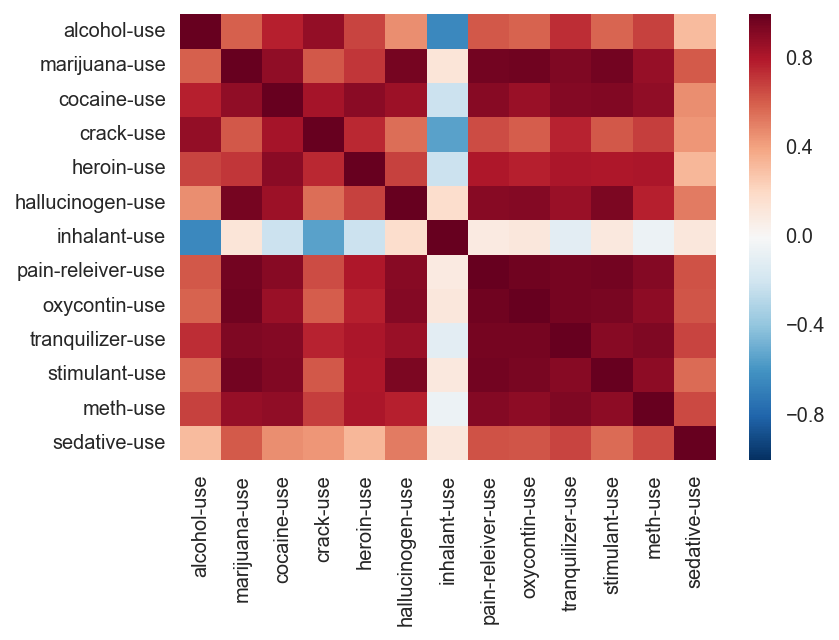

In [592]:
sns.heatmap(drug_data[use].corr())

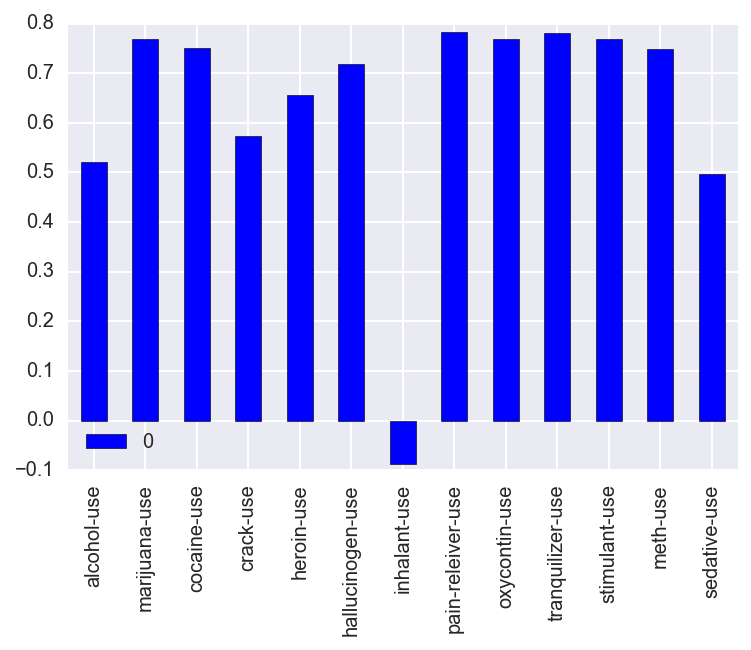

In [616]:

drug_corr.plot(kind="bar",color="b")
plt.show()

In [ ]:
# From the corr table, heatmap, and bar graph we can see that marajuana use 
# has a high mean correlation with other drug uses.
# However it does not have the highest mean correlation.
# pain-releiver use has the highest, tranquilizzer use is second, oxycontin-use third, stimulant-use fourth,
# and marajuan use is fith

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.